<a href="https://colab.research.google.com/github/eduardoalsilva/machine-learning-2025/blob/main/star_wars_clones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_parquet("dados_clones.parquet")
df

,p2o_master_id,Massa(em kilos),General Jedi encarregado,Estatura(cm),Distância Ombro a ombro,Tamanho do crânio,Tamanho dos pés,Tempo de existência(em meses),Status
0,10578986,83.13,Yoda,180.25,Tipo 4,Tipo 1,Tipo 5,0.0,Defeituoso
1,10976676,83.08,Yoda,180.39,Tipo 3,Tipo 2,Tipo 5,0.0,Defeituoso
2,10588329,83.12,Shaak Ti,180.26,Tipo 4,Tipo 5,Tipo 5,0.0,Defeituoso
3,10254411,83.38,Shaak Ti,180.35,Tipo 2,Tipo 2,Tipo 5,0.0,Defeituoso
4,10634458,83.15,Shaak Ti,180.31,Tipo 3,Tipo 2,Tipo 2,0.0,Defeituoso
...,...,...,...,...,...,...,...,...,...
1048714,10230117,84.14,Yoda,181.03,Tipo 2,Tipo 1,Tipo 2,51.3,Apto
1048715,10230118,83.10,Yoda,180.62,Tipo 2,Tipo 1,Tipo 3,3.3,Apto
1048716,10230119,83.63,Obi-Wan Kenobi,180.54,Tipo 5,Tipo 2,Tipo 5,40.1,Apto
1048717,10230120,83.02,Shaak Ti,180.06,Tipo 1,Tipo 4,Tipo 1,11.2,Apto


In [4]:
df["General Jedi encarregado"].unique()


array(['Yoda', 'Shaak Ti', 'Obi-Wan Kenobi', 'Aayla Secura', 'Mace Windu'],
      dtype=object)

In [5]:
df["Distância Ombro a ombro"].unique()


array(['Tipo 4', 'Tipo 3', 'Tipo 2', 'Tipo 1', 'Tipo 5'], dtype=object)

In [6]:
df['Tamanho do crânio'].unique()


array(['Tipo 1', 'Tipo 2', 'Tipo 5', 'Tipo 3', 'Tipo 4'], dtype=object)

In [7]:
df['Tamanho dos pés'].unique()


array(['Tipo 5', 'Tipo 2', 'Tipo 1', 'Tipo 3', 'Tipo 4'], dtype=object)

In [10]:
df.columns

Index(['p2o_master_id', 'Massa(em kilos)', 'General Jedi encarregado',
       'Estatura(cm)', 'Distância Ombro a ombro', 'Tamanho do crânio',
       'Tamanho dos pés', 'Tempo de existência(em meses)', 'Status '],
      dtype='object')

In [11]:
features = ["Massa(em kilos)", "Estatura(cm)", "Distância Ombro a ombro", "Tamanho do crânio", "Tamanho dos pés", "Tempo de existência(em meses)"]
target = "Status "

X = df[features]
y = df[target]

X = X.replace({
    "Tipo 1": 1,
    "Tipo 2": 2,
    "Tipo 3": 3,
    "Tipo 4": 4,
    "Tipo 5": 5
})

/tmp/ipython-input-1561257112.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({


In [12]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X, y)


DecisionTreeClassifier()

[Text(0.6666666666666666, 0.9, 'Massa(em kilos) <= 83.405\ngini = 0.189\nsamples = 1048719\nvalue = [938193, 110526]\nclass = Apto'),
 Text(0.5, 0.7, 'Estatura(cm) <= 180.555\ngini = 0.436\nsamples = 344571\nvalue = [234045, 110526]\nclass = Apto'),
 Text(0.5833333333333333, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'Estatura(cm) <= 180.245\ngini = 0.497\nsamples = 205177\nvalue = [94651, 110526]\nclass = Defeituoso'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 53107\nvalue = [53107, 0]\nclass = Apto'),
 Text(0.5, 0.3, 'Tempo de existência(em meses) <= 16.85\ngini = 0.397\nsamples = 152070\nvalue = [41544, 110526]\nclass = Defeituoso'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.6666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 139394\nvalue = [139394, 0]\nclass = Apto'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 704148\nvalue = [704148, 0]\nclass = Apto'),
 Text(0.75, 0.8, '  False')]

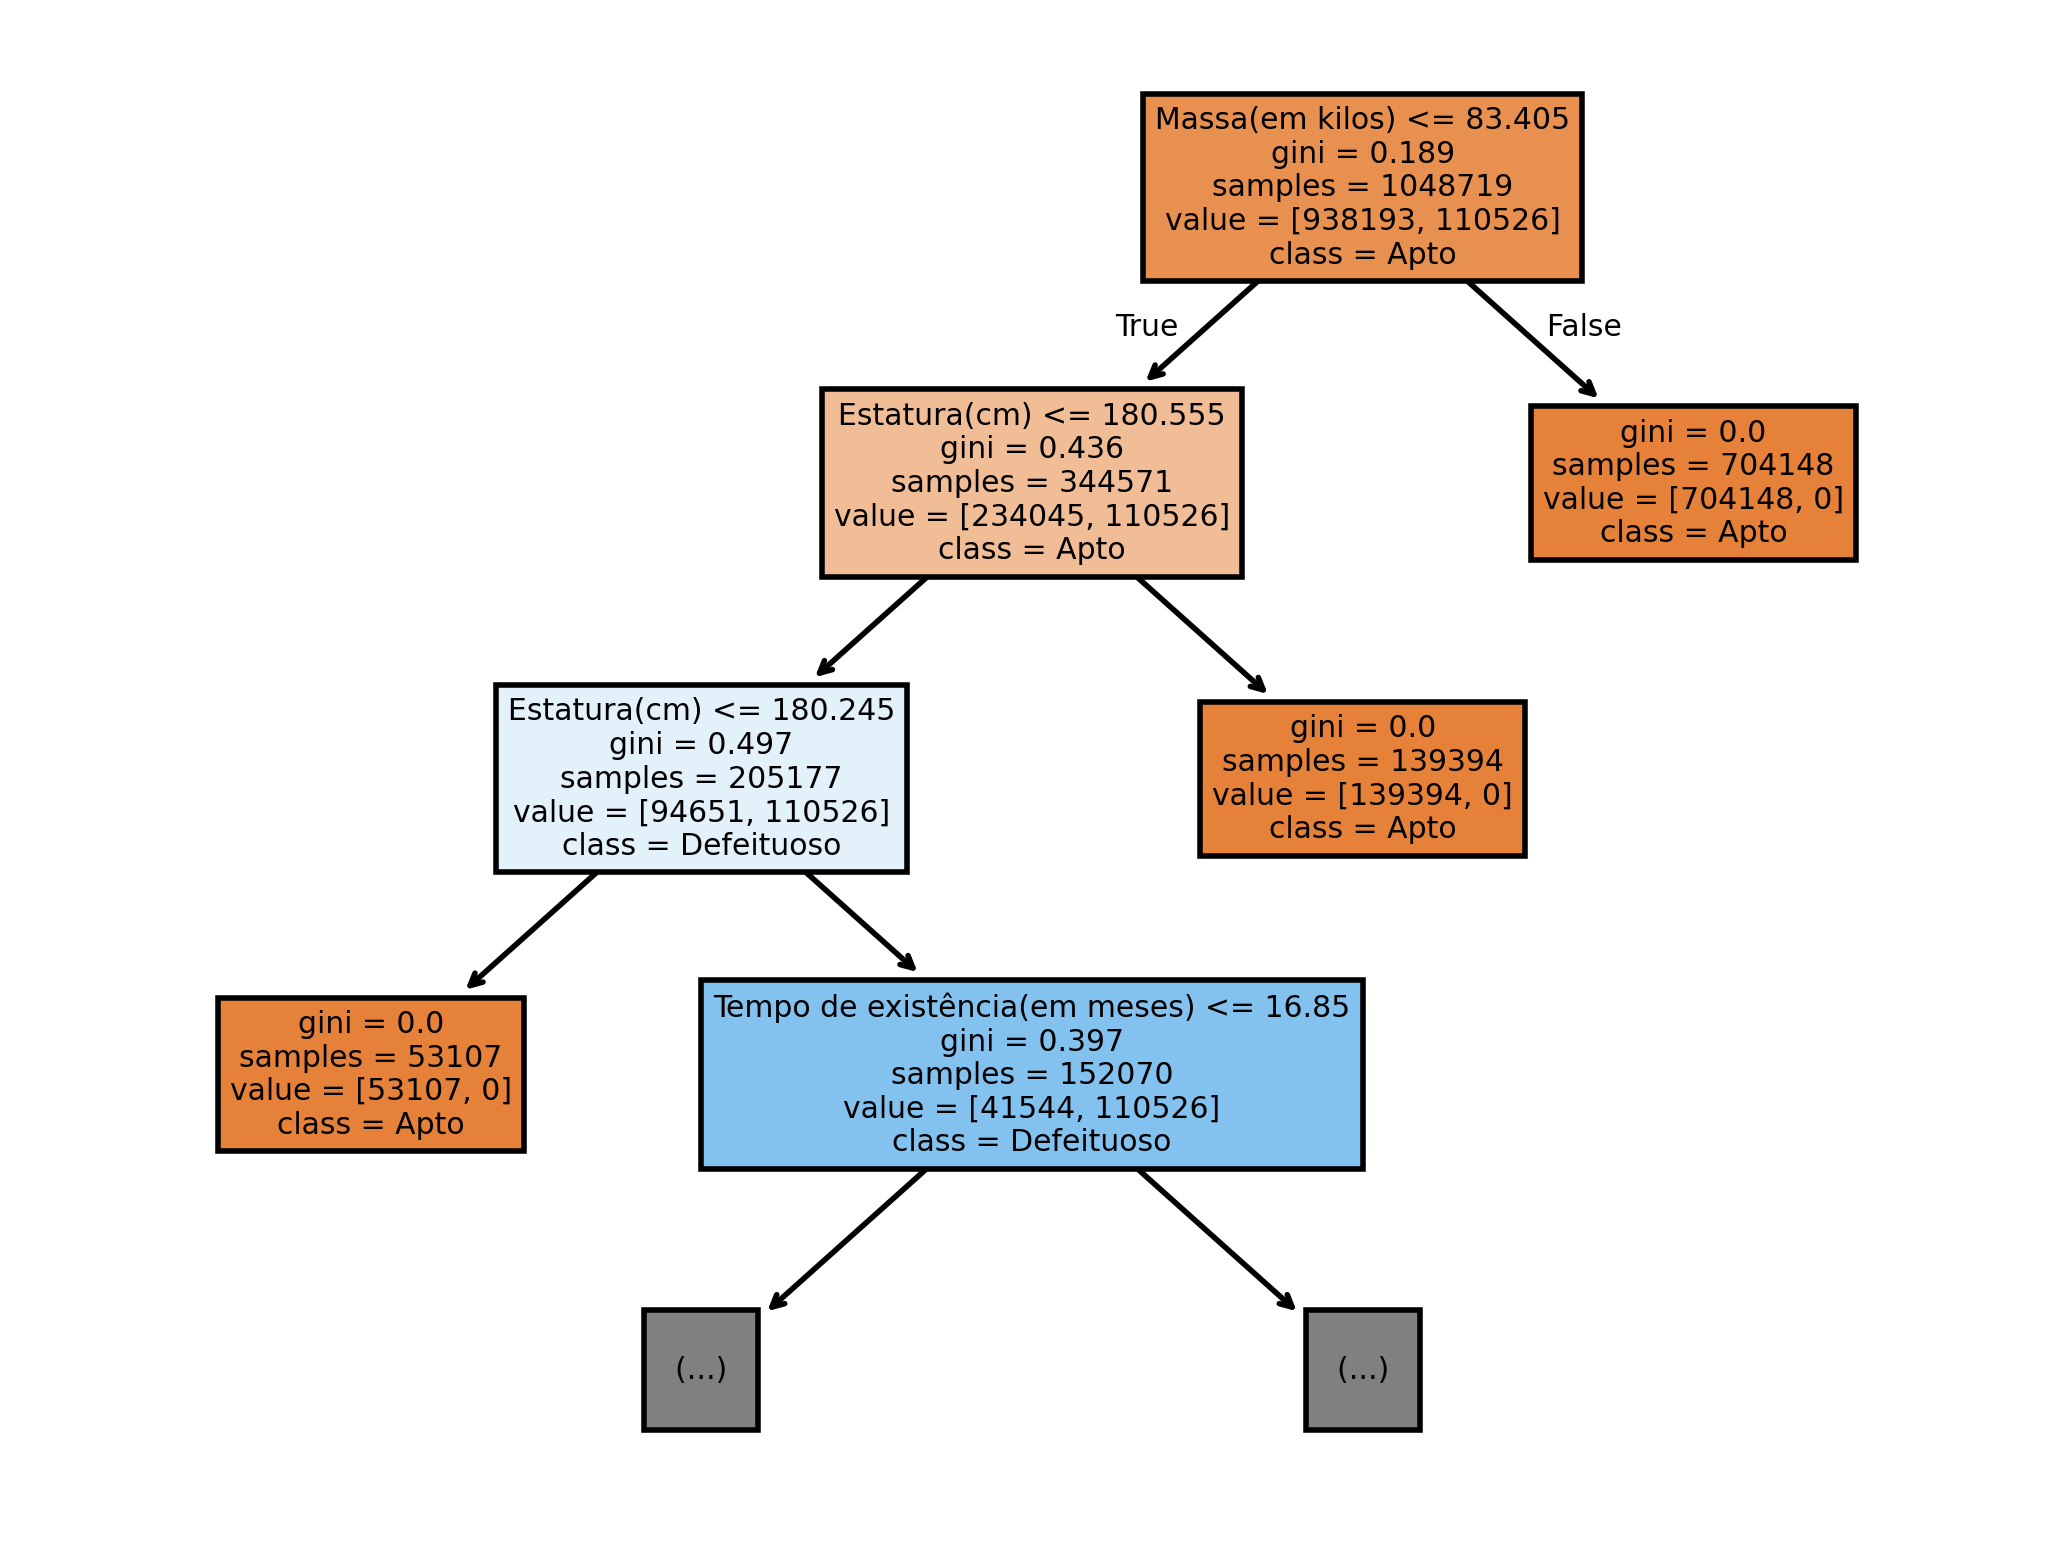

In [15]:
import matplotlib.pyplot as plt

plt.figure(dpi=400)
tree.plot_tree(
    model,
    feature_names=features,
    class_names=model.classes_,
    filled=True,
    max_depth=3
)